# Lab 7: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

In this lab, we will make first steps in doint supervised learning. in particular, we will learn about the k-Nearest Neighbor (kNN) algorithm. kNN uses a simple idea: "you are what your neighbors are". This idea work quite well in data science. In the first part of the lab, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Lab 7.A: kNN Tutorial with Questions (50% of grade)

As usual, let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [5]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with attributes `data` (a 150x4 matrix, where $i$-th row are 4 attributes of the $i$-th flower), `feature_names` (the names of the 4 attributes -- remember that in data science "attribute" and "feature" means the same thing), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in data science people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [3]:
print iris.DESCR
print iris.data
print iris.feature_names
print iris.target
print iris.target_names

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

So, we can see that the attributes of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In data science, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 attributes and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose attributes are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it.

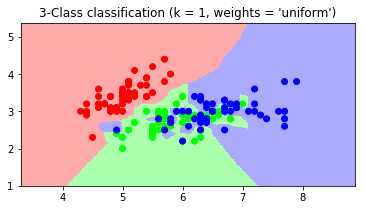

In [197]:
k = 1   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. 
y = iris.target #get the types of flowers

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance') #create an instance for KNN
clf.fit(X, y) #fitting the training dataset on variables X

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why. No difference because the data is well-clustered

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss. No difference because the area is well-clustered

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference. Uniform means that all points within the region have the same weight, while distance means that all points closer to the query point will have more weight

**Question 4**. Take a look at the code and try to understand what each line of the code does. Explain each line of code. I have commented next to each line of code

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [203]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

**Question 5**. What is the size of the resulting objects? 33% of the dataset, so about 50

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [204]:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance')
predictor.fit(X_train, y_train);
print predictor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [205]:
# select the first 4 test examples
i = [0,1,2,3]
#i = range(20)
x = X_test[i,:]
print x
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
first_four =  np.array(zip(yhat,y_test[i]))
print first_four

[[ 5.4  3.4]
 [ 6.9  3.1]
 [ 4.6  3.1]
 [ 6.3  3.4]]
[[0 0]
 [1 2]
 [0 0]
 [2 2]]


**Question 6**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? Yes, only 1 of the 4 was incorrect. Actually,  of the first 10 test examples, only 1 of them was incorrect...

**Question 7**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses

**Question 8**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 7*.

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 7 and 8):

In [206]:
#Question 7:
accuracy_4 = np.where(first_four[:,0] == first_four[:,1],1,0)
print float(accuracy_4.sum())/float(len(accuracy_4))

0.75


In [207]:
#Question 8:
accuracy = predictor.score(X_test,y_test)
print accuracy

#or using method in question 7:
check =  np.array(zip(yhat,y_test))
accuracy2 = np.where(check[:,0] == check[:,1],1,0)
print float(accuracy2.sum())/float(len(accuracy2))

0.68
0.75


**Question 9**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you. k = 1 has the highest accuracy but overall they are very close to each other. It doesn't really make sense but I guess it is because of this particular split

k = 1: 0.8

k = 3: 0.78

k = 5: 0.74

k = 15: 0.76

k = 25: 0.78

k = 50: 0.78

**Question 10**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

Aside from the choice of k and weights, which include uniform, distance, or a user-defined method, we can also choose algorithms, which ranges from BallTree, KDTree, to BruteForce search. We can also choose leaf size, metric as well as number of parallel jobs

In [66]:
k = 50 # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance')
predictor.fit(X_train, y_train);
print predictor
accuracy = predictor.score(X_test,y_test)
print accuracy

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='distance')
0.78


## Lab 7.B Training kNN classifier on Iris and Newsgroups data
In this part of the lab you will use your knowledge to train and test accuracy of kNN classifiers on Iris and Newsgroups data.

#### Iris Questions
In Lab 7.A you used only the first two attributes of Iris for prediction. You have 2 questions:

**Question Iris 1**. Train kNN classifier on other pair of attributes. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of attributes results in the highest accuracy? The pair of third and fourth attributes has 98% accuracy so this pair is the best

** Question Iris 2**. Train kNN classifier using all 4 attributes. Report the accuracy on test data set. (98% for k = 10) Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices? the accuracy stays at 96% for any k > 3



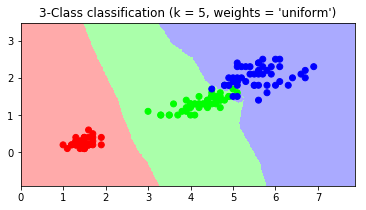

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
0.98


In [163]:
#Question Iris 1:
k = 5   # how many nearest neighbors are consulted

X = iris.data[:, [2,3]]  
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y) #fitting the training dataset on variables X

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
#from sklearn.neighbors import KNeighborsClassifier

predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
predictor.fit(X_train, y_train);
print predictor
accuracy = predictor.score(X_test,y_test)
print accuracy


In [106]:

k = 20   # how many nearest neighbors are consulted

X = iris.data[:, [0,1,2,3]]  
y = iris.target

h = .02  # step size in the mesh


# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y) #fitting the training dataset on variables X



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
#from sklearn.neighbors import KNeighborsClassifier

predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
predictor.fit(X_train, y_train);
print predictor
accuracy = predictor.score(X_test,y_test)
print accuracy


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')
0.96


**Newsgroup questions**

In [86]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')


**Question News 1**. Since kNN is a relatively slow algorithms, create your data set by picking 1,000 examples randomly. Remember to record both attribute values and labels. Split your data into 66% training and 33% test data sets.

**Question News 2**. Train a kNN classifier ($k=3$ and defaults) on the training data and test its accuracy on test data. Record the computational time needed to run this. Report the accuracy (pay attention there are 4 types of documents).

**Question News 3**. Train a kNN classifier using different values of $k$, hoping to improve accuracy. Try to use some other distance other than Euclidean. For example, cosine distance is know to work better than Eucliedean on text data.

**Question Nesw 4**. Transform the original 100 attributes into 5 attributes using SVD. Train and test the kNN on the transformed data. Report the accuracies. You might be surprised to see that accuracy could go up. Discuss why this might be so.
More attribute => more chances to overfit => accuracy on test set bad. Thus, less attributes => less likely to overfit => more accuracy

**Question News 1 and 2:**

In [87]:
newsgroup1 = newsgroup.reshape(16242,1)
documents = np.hstack((documents,newsgroup1))

In [88]:
i = np.random.randint(0,documents.shape[0],1000)
randomdoc = documents[i]
randomdoc


array([[0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 1]])

In [178]:
randomdoc.shape

(1000L, 101L)

In [117]:
import timeit

In [168]:
k = 3   # how many nearest neighbors are consulted

X = randomdoc[:, :100]  
y = randomdoc[:,-1]

h = .02  # step size in the mesh

start_time = timeit.default_timer()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance')
predictor.fit(X_train, y_train);
print predictor
accuracy = predictor.score(X_test,y_test)
print 'The accuracy is: '+ str(accuracy)

elapsed = timeit.default_timer() - start_time
print str(elapsed) + "s"

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')
The accuracy is: 0.618181818182
0.0688797167218s


**Question News 3**:

In [190]:
k = 16
predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'manhattan')
predictor.fit(X_train, y_train);
print predictor
accuracy = predictor.score(X_test,y_test)
print 'The accuracy is: '+ str(accuracy)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='distance')
The accuracy is: 0.660606060606


In [191]:
U1,s1,V1 = np.linalg.svd(X,full_matrices=0)

In [186]:
Unew = np.dot(U1[:,0:5], np.diag(s1)[0:5,0:5])

In [192]:
Unew.shape

(1000L, 5L)

In [193]:
k = 3
X_train, X_test, y_train, y_test = train_test_split(
    Unew, y, test_size=0.33)

predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
predictor.fit(X_train, y_train);
print predictor
accuracy = predictor.score(X_test,y_test)
print 'The accuracy is: '+ str(accuracy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
The accuracy is: 0.609090909091
